# Logistic Regression with a Neural Network mindset

欢迎来到您的第一个（必填）编程任务！你将建立一个逻辑回归分类器来识别猫。这个任务将指导你如何用神经网络的思维方式做到这一点，所以也将磨练你对深度学习的直觉。

**说明：**

不要在代码中使用循环（for / while），除非指令明确要求您这样做。

**您将学习：**

构建一个学习算法的总体架构，包括：
- 初始化参数
- 计算成本函数及其梯度
- 使用优化算法（梯度下降）
将上述三个函数按照正确的顺序收集到主模型函数中。

## 1 - Packages ##

首先，运行下面的单元格，导入您在此作业中需要的所有软件包。
- [numpy](www.numpy.org) 科学计算的基本软件包。
- [h5py](http://www.h5py.org) 是与数据集（存储在H5文件中的数据集）交互的常用软件包。
- [matplotlib](http://matplotlib.org) 著名的绘图工具
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) 最后环节用自己的图片测试自己的模型。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: 给你一个数据集 ("data.h5") ，它包含以下信息:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

您将构建一个简单的图像识别算法，可以正确地将图片分类为猫或非猫

现在来熟悉下数据集。运行下面的代码加载数据。

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

我们在图像数据集（训练和测试）的最后添加了“_orig”，因为我们要对它们进行预处理。 After preprocessing, we will end up with train_set_x and test_set_x (train_set_y和test_set_y标签不需要任何预处理).

train_set_x_orig和test_set_x_orig的每一行都是一个表示图像的数组。您可以通过运行以下代码来可视化示例。随意更改index值并重新运行以查看其他图像。

y = [0], it's a 'non-cat' picture.


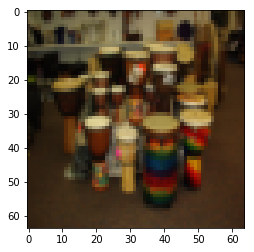

In [5]:
# Example of a picture
index = 5
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

深度学习中的很多software bugs都是因为矩阵/矢量的维度不匹配。如果你能保证矩阵/向量维度的正确，可以消除许多错误

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [6]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
### START CODE HERE ### (≈ 3 lines of code)
#print(train_set_x_orig)
m_train = len(train_set_x_orig)
m_test  = len(test_set_x_orig)
num_px  = (train_set_x_orig.shape[1])
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience（方便起见）, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [7]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
### 转换成为行向量，不过我们需要的是
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten  = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255的三个数字的向量。

机器学习中一个常见的预处理步骤是对数据集进行中心化和标准化，这意味着您从每个示例中减去整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准偏差。但是对于图片数据集来说，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值）。

让我们标准化我们的数据集。

In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**你需要记住的是：**

面对一个新的数据集，常见的预处理步骤如下：
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

是时候设计一个简单的算法来区分猫图像和非猫图像。
你将建立一个Logistic回归，使用神经网络的思维方式。下图解释了为什么**Logistic回归实际上是一个非常简单的神经网络！**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**：在本练习中，您将执行以下步骤：
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

建立神经网络的主要步骤是：

- 定义模型结构（如输入特征的个数）
- 初始化模型的参数
- 循环：
 - 计算当前损失（正向传播）
 - 计算当前梯度（反向传播）
 - 更新参数（梯度下降）
 
你经常分别建立1-3，并把它们整合到我们所说的一个函数中model()。

### 4.1 - Helper functions 辅助函数

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [9]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** 在下面的单元格中实现参数初始化。您必须将w初始化为零向量。如果您不知道要使用哪个numpy函数，请在Numpy库文档中查找 np.zeros()。

In [22]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ###END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [23]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

现在您的参数已初始化，您可以执行“前向”和“后向”传播来学习参数。

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [11]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
             # compute activation
             # compute cost
    activation = sigmoid(np.dot(w.T,X)+b)
#     print("activation="+str(activation))
#     print("Y="+str(Y))
    cost =  -1/m * np.sum(Y * np.log(activation) + (1-Y)* np.log(1-activation))

    #cost = -1 / m * np.sum(Y * np.log(activation) + (1 - Y) * np.log(1 - activation))
    #print("cost="+str(cost))

    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = np.dot(X,(activation -Y).T)/m
    db = np.sum(activation -Y)/m
    ### END CODE HERE ###
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### d) Optimization
- 你已经初始化了你的参数。
- 您也可以计算成本函数及其梯度。
- 现在，您要使用梯度下降来更新参数。

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [13]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679
[6.0000647731922054]


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

**Exercise:** 前面的函数将输出学习到的w和b。我们可以使用训练好的w和b来预测数据集X的标签。预测的步骤有两步：

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [49]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X)+b)
    
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0][i] >= 0.5:
            Y_prediction[0][i] = 1
        else :
            Y_prediction[0][i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [50]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
你已经实现了几个功能：
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

现在，您将看到整个模型是如何构建的，将所有构建模块（前面部分中实现的功能）以正确的顺序放在一起。

**练习：**实现模型功能。使用以下表示法：
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [51]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    print("X="+str(X_train))
    w, b = initialize_with_zeros(X_train.shape[0])
    
    print("X.shape="+str(X.shape))
    print("b="+str(b))
    print("X_train.shape="+str(X_train.shape))
    print("Y_train.shape="+str(Y_train.shape))
    
    grads, cost = propagate(w, b, X_train, Y_train)
    print("grads="+str(grads))
    print("cost="+str(cost))
    # Retrieve parameters w and b from dictionary "parameters"
    params,grads,costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate,  False)
    print("params="+str(params['w'].shape))
    print("params['b'].shape="+str(params['b'].shape))
    print(str(params['b']))
    print("costs="+str(costs))
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(params['w'],params['b'], X_train)
    Y_prediction_test = predict(params['w'],params['b'], X_test)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [52]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

X=[[ 0.06666667  0.76862745  0.32156863 ...,  0.56078431  0.08627451
   0.03137255]
 [ 0.12156863  0.75294118  0.27843137 ...,  0.60784314  0.09411765
   0.10980392]
 [ 0.21960784  0.74509804  0.26666667 ...,  0.64705882  0.09019608
   0.20784314]
 ..., 
 [ 0.          0.32156863  0.54117647 ...,  0.33333333  0.01568627  0.        ]
 [ 0.          0.31372549  0.55294118 ...,  0.41960784  0.01960784  0.        ]
 [ 0.          0.31764706  0.55686275 ...,  0.58431373  0.          0.        ]]
X.shape=(2, 2)
b=0
X_train.shape=(12288, 209)
Y_train.shape=(1, 209)
grads={'dw': array([[ 0.04720893],
       [ 0.06299841],
       [ 0.04923539],
       ..., 
       [ 0.05074585],
       [ 0.0621259 ],
       [ 0.03245145]]), 'db': 0.15550239234449761}
cost=0.69314718056
params=(12288, 1)
params['b'].shape=()
-0.0159062439997
costs=[0.69314718055994529, 0.58450836369930859, 0.46694904094655476, 0.37600686694802077, 0.3314632893282512, 0.30327306747438293, 0.27987958658260487, 0.26004213692587569,

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**Comment**: 训练的准确性接近100％。This is a good sanity check: 您的模型正在运行，并且具有足够的能力来拟合训练数据。测试错误是68％。考虑到我们使用的小数据集，逻辑回归是一个线性分类器，对于这个简单的模型这个结果实际上并不差。不用担心，下周会建立一个更好的分类器！

另外，您会发现模型明显过拟合。稍后你将学习如何防止过拟合，例如通过正则化。使用下面的代码（更改index变量），您可以查看测试集的图片预测。

y = 1, you predicted that it is a "non-cat" picture.


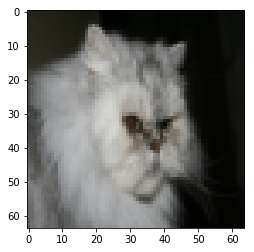

In [57]:
# Example of a picture that was wrongly classified.
index = 10
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

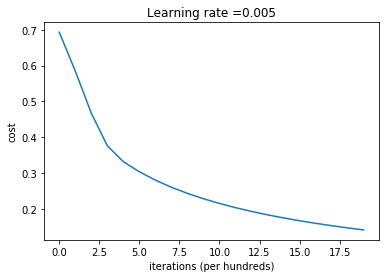

In [58]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis (optional/ungraded exercise) ##

恭喜你构建了你的第一个图像分类模型。现在让我们来进一步分析，研究学习率$\alpha$的可能性选择。

#### Choice of learning rate ####
**Reminder**：为了使梯度下降起作用，您必须明智地选择学习速度。学习率 α 决定了我们更新参数的速度。如果学习率太高，我们可能会“超过”最优值。同样，如果它太小，我们将需要太多迭代来收敛到最佳值。这就是为什么使用良好的学习速度至关​​重要。

让我们来比较一下用了不同学习率的模型的学习曲线。运行下面的单元格。大概需要1分钟。随意尝试不同的值，看看会发生什么。

learning rate is: 0.02
X=[[ 0.06666667  0.76862745  0.32156863 ...,  0.56078431  0.08627451
   0.03137255]
 [ 0.12156863  0.75294118  0.27843137 ...,  0.60784314  0.09411765
   0.10980392]
 [ 0.21960784  0.74509804  0.26666667 ...,  0.64705882  0.09019608
   0.20784314]
 ..., 
 [ 0.          0.32156863  0.54117647 ...,  0.33333333  0.01568627  0.        ]
 [ 0.          0.31372549  0.55294118 ...,  0.41960784  0.01960784  0.        ]
 [ 0.          0.31764706  0.55686275 ...,  0.58431373  0.          0.        ]]
X.shape=(2, 2)
b=0
X_train.shape=(12288, 209)
Y_train.shape=(1, 209)
grads={'dw': array([[ 0.04720893],
       [ 0.06299841],
       [ 0.04923539],
       ..., 
       [ 0.05074585],
       [ 0.0621259 ],
       [ 0.03245145]]), 'db': 0.15550239234449761}
cost=0.69314718056
params=(12288, 1)
params['b'].shape=()
0.016414094726
costs=[0.69314718055994529, 1.6698723854904007, 0.39054400568727948, 0.22127354061363541, 1.4971399234693632, 1.4252837072603108, 0.12029975569321276, 0

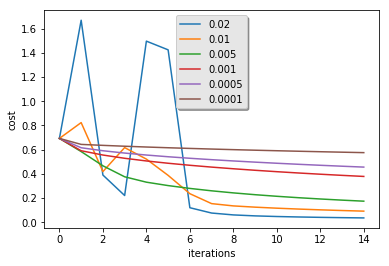

In [60]:
learning_rates = [0.02,0.01,0.005, 0.001,0.0005, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**解读：**
- 不同的学习率绘制出了不同的成本函数，并给出了不同的预测结果。
- 如果学习率太大（0.01），成本可能会上下波动。It may even diverge ((though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- 成本较低并不意味着模型更好。你必须检查是否过拟合。过拟合的特征是训练的错误率远低于测试的错误率。
- 在深度学习中，我们通常建议您：
    - 选择更好地能最小化成本函数的学习率。
    - 如果您的模型过拟合，请使用其他技术来减少过拟合。（我们将在稍后的视频中讨论这个问题。）

## 7 - 用自己的图片来测试 (optional/ungraded exercise) ##

祝贺您完成这项任务。您可以使用自己的图片并查看模型的输出. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [101]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "cat_in_iran.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

FileNotFoundError: [Errno 2] No such file or directory: 'images/cat_in_iran.jpg'

<font color='blue'>
**这个作业要记住的是：**
- 数据的预处理集非常重要。
- 你分别实现了下面的每个函数：initialize（），propagate（），optimize（）。然后你建立了一个模型。
- 调整学习率（这是“超参数”的一个例子）会对算法产生很大的影响。在本课程后面你会看到更多的例子！

最后，如果你愿意，我们希望你尝试些不同的东西。
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography(参考书目):
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c